# 均值、期望值

In [8]:
import numpy as np

a = np.arange(1, 8)
print(a)
print(np.mean(a))

a = np.arange(1, 13).reshape(3, 4)
print(a)
print(np.mean(a))
print(np.mean(a, axis=0))
print(np.mean(a, axis=1))

[1 2 3 4 5 6 7]
4.0
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
6.5
[5. 6. 7. 8.]
[ 2.5  6.5 10.5]


# 方差、标准差

In [8]:
import numpy as np

print(np.var([3,5]))
print(np.var([3,5], ddof=1))

a = np.arange(1, 13).reshape(3, 4)
print(a)
print(np.var(a, ddof=1))
print(np.var(a, ddof=1, axis=0))
print(np.var(a, ddof=1, axis=1))

print(np.std([3,5]))
print(np.std([3,5], ddof=1))

a = np.arange(1, 13).reshape(3, 4)
print(a)
print(np.std(a, ddof=1))
print(np.std(a, ddof=1, axis=0))
print(np.std(a, ddof=1, axis=1))

1.0
1.4142135623730951
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
3.605551275463989
[4. 4. 4. 4.]
[1.29099445 1.29099445 1.29099445]


# 协方差

In [14]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,6,5,4,3,2,1])

c = np.cov(x, y)[0, 1]
print(c)

np.corrcoef(x, y)[0, 1]

-7.5


-1.0

# 协方差矩阵

In [ ]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,6,5,4,3,2,1])
a = np.array([x, y])
print(a)

c = np.cov(a)
print(c)
print(np.corrcoef(a))

# PCA主成分分析

In [2]:
import numpy as np
import sklearn

A = np.arange(1, 7).reshape(3, 2)
print(A)

M = np.mean(A.T, axis=1)
C = A - M

V = np.cov(C.T)
values, vectors = np.linalg.eig(V)

print('----my calc----')
print(vectors)
print(values)
P = vectors.T.dot(C.T)
print(P.T)


print('----sklean calc----')
pca = sklearn.decomposition.PCA(2)
pca.fit(A)
B = pca.transform(A)

print(pca.components_)
print(pca.explained_variance_)
print(B)

[[1 2]
 [3 4]
 [5 6]]
----my calc----
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]
----sklean calc----
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[8.00000000e+00 2.25080839e-33]
[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


# PCA用处图像压缩

(200, 60)


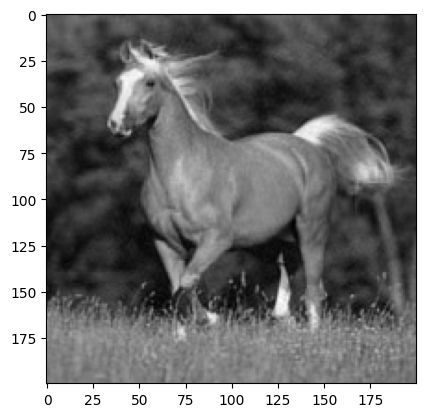

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.pyplot import imread


img = imread("palomino_horse.png")
img = img[:,:,0]


pca = PCA(n_components = 60).fit(img)
transformed = pca.transform(img)
print(transformed.shape)
projection = pca.inverse_transform(transformed)
plt.imshow(projection, cmap="gray")